# EDA: survey_vitals

In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("colorblind")
sns.set(font_scale = 1.1)
sns.set_style("whitegrid")

In [376]:
survey_vitals = pd.read_csv("survey_vitals_noDummies.csv")

In [377]:
def sex_func(feat):
    if feat == 0:
        return "female"
    else:
        return "male"

In [378]:
survey_vitals["sex"] = survey_vitals["M"].apply(sex_func)
survey_vitals = survey_vitals.replace({"None": np.nan})

In [379]:
survey_vitals.head() # 9599 total responses

,objectId,marriageStatus,occupation,educationLevel,latitude,longitude,city,province,insuranceProvider,weight,pulse,bloodSugar,M,F,age,sex
0,XHCkKebF4a,single,Ama de casa,lessThanprimary,18.912087,-70.743801,NaN,NaN,NaN,NaN,NaN,NaN,0,1,34.0,female
1,nCqmOAp4r9,concubine,Other,highschool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,36.0,male
2,E6Muqo5331,concubine,Other,lessThanprimary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,41.0,female
3,LwMJ2wrMkZ,single,Ama de casa,highschool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,30.0,female
4,4kBFEjUSNz,single,Ama de casa,primary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,49.0,female


In [256]:
survey_vitals.latitude

0       18.912087
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
9594    19.486911
9595    19.487139
9596    19.487401
9597    19.487400
9598    19.487339
Name: latitude, Length: 9599, dtype: float64

In [171]:
survey_vitals.isnull().sum()

objectId                0
marriageStatus       1653
occupation              0
educationLevel       1542
latitude               27
longitude              27
city                 1332
province             1412
insuranceProvider    7582
weight               9032
pulse                8457
bloodSugar           9067
M                       0
F                       0
age                   513
sex                     0
dtype: int64

We cannot use insurance provider, blood sugar, pulse, and weight because these features have a lot of null values. 

### Latitude, Longitude

In [273]:
print("\nLatitude data median\n")
print(survey_vitals.latitude.median())
print("\nLongitude data median\n")
print(survey_vitals.longitude.median())


Latitude data median

18.62226286904758

Longitude data median

-69.28905311153045


In [320]:
survey_vitals.shape

(9599, 15)

In [345]:
df = survey_vitals.query('-75 <= longitude <= -50 & 15 <= latitude <= 21')
df.shape

(9458, 15)

In [355]:
BBox = ((df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max()))
BBox

(-72.20186460340781, -68.67654746404726, 18.34992960259429, 19.762435600000003)

In [363]:
dom_map = plt.imread("map.png")

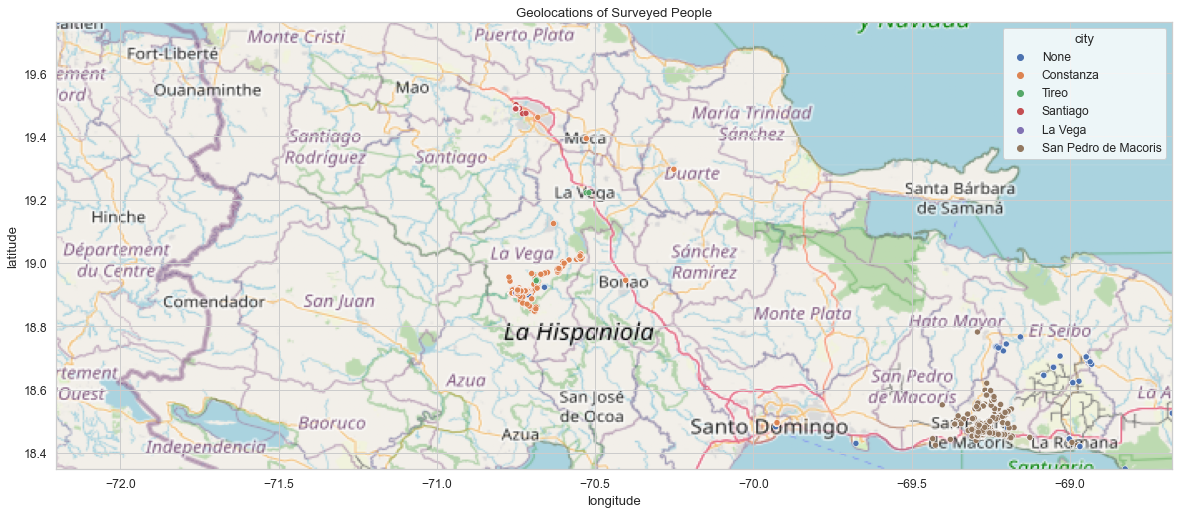

In [423]:
plt.figure(figsize = (20,14))
ax = sns.scatterplot(data = df, x = "longitude", y = "latitude", hue = "city", palette = "deep")
ax.set_title("Geolocations of Surveyed People")
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(dom_map, zorder=0, extent = BBox, aspect= 'equal')

### Marriage Status, Occupation, Education Level, Age

In [172]:
for feat in list(survey_vitals.columns.values[1:4]):
    print(survey_vitals[feat].value_counts())
    print("")

single        3583
free_union    2678
married       1041
widow          342
concubine      302
Name: marriageStatus, dtype: int64

Other          5055
Ama de casa    2764
Estudiante     1078
Agriculture     252
Comerciante     116
No trabaja      116
Ninguna         112
Menor           106
Name: occupation, dtype: int64

lessThanprimary    4269
someHighSchool     1109
primary            1075
highschool         1072
college             444
someCollege          88
Name: educationLevel, dtype: int64



In [173]:
survey_vitals.describe().age

count    9086.000000
mean       38.243672
std        21.652050
min         0.000000
25%        22.000000
50%        37.000000
75%        55.000000
max       104.000000
Name: age, dtype: float64

Text(0.5, 118.50000000000011, 'Age')

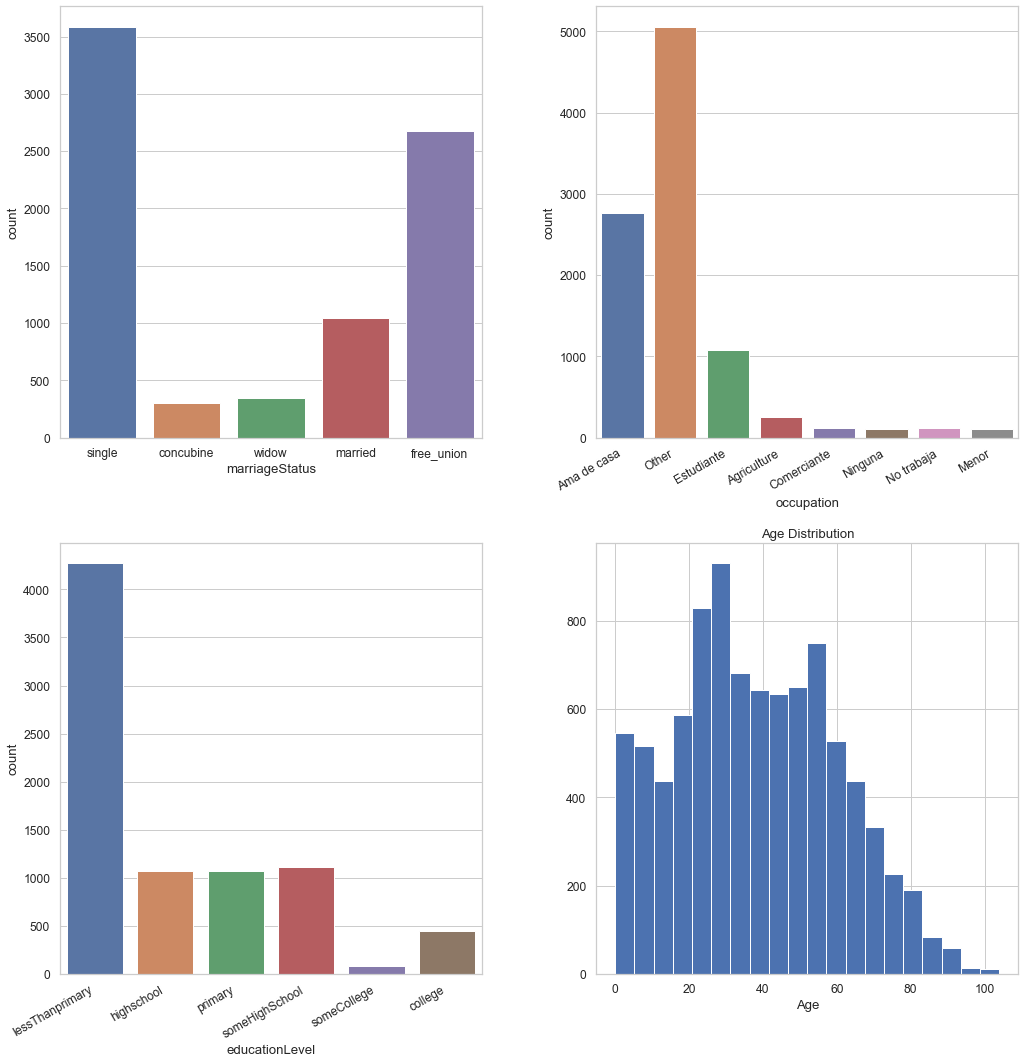

In [174]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
fig.set_size_inches(16, 16)
fig.tight_layout(pad=6.0)
ax1 = sns.countplot(x = "marriageStatus", data = survey_vitals, ax = ax1)
ax2 = sns.countplot(x = "occupation", data = survey_vitals, ax = ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), 
                          rotation=30, 
                          horizontalalignment='right')
ax3 = sns.countplot(x = "educationLevel", data = survey_vitals, ax = ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), 
                          rotation=30, 
                          horizontalalignment='right')
plt.hist(survey_vitals["age"], bins = 20)
plt.title("Age Distribution")
plt.xlabel("Age")

### City, Province, Insurance Provider

In [175]:
for feat in ["city", "province", "insuranceProvider"]:
    print(survey_vitals[feat].value_counts())
    print("")

San Pedro de Macoris    4438
Constanza               3343
Santiago                 197
Tireo                    147
La Vega                  142
Name: city, dtype: int64

San Pedro de Macoris    4324
La Vega                 3229
Constanza                379
Santiago                 199
Consuelo                  56
Name: province, dtype: int64

Senasa        1664
Other          206
ARS Humano     147
Name: insuranceProvider, dtype: int64



[Text(0, 0, 'La Vega'),
 Text(1, 0, 'Santiago'),
 Text(2, 0, 'Constanza'),
 Text(3, 0, 'San Pedro de Macoris'),
 Text(4, 0, 'Consuelo')]

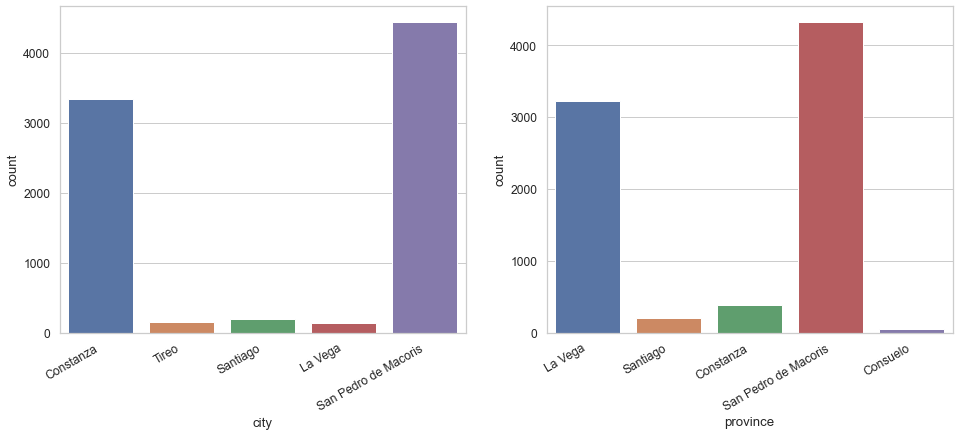

In [176]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16, 6)
ax1 = sns.countplot(x = "city", data = survey_vitals, ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), 
                          rotation=30, 
                          horizontalalignment='right')
ax2 = sns.countplot(x = "province", data = survey_vitals, ax = ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), 
                          rotation=30, 
                          horizontalalignment='right')


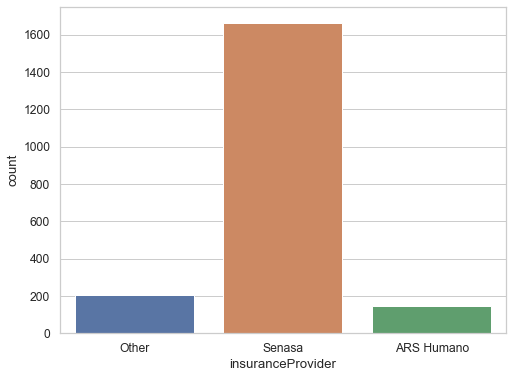

In [177]:
fig, ax = plt.subplots() # not useful because too many missing values. 
fig.set_size_inches(8, 6)
ax = sns.countplot(x = "insuranceProvider", data = survey_vitals)

### Sex and age

In [178]:
survey_vitals.sex.value_counts()

female    6151
male      3448
Name: sex, dtype: int64

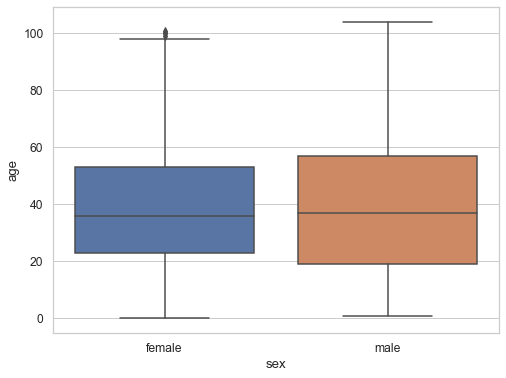

In [179]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
ax = sns.boxplot(x = "sex", y = "age", data = survey_vitals)

### Relationships between variabels

In [180]:
marriage_sex = pd.crosstab(index = survey_vitals["sex"], columns = survey_vitals["marriageStatus"]).T.reset_index()
marriage_sex

sex,marriageStatus,female,male
0,concubine,216,86
1,free_union,1853,825
2,married,665,376
3,single,2140,1443
4,widow,286,56


Text(0.5, 1.0, 'Male Distribution')

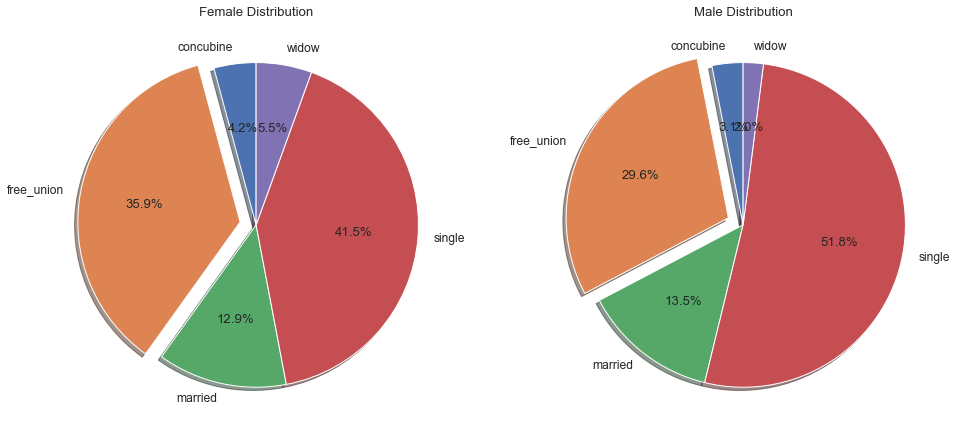

In [181]:
explode = (0,0.1,0,0,0)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16, 12)
ax1.pie(marriage_sex["female"], explode = explode, labels = marriage_sex["marriageStatus"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title("Female Distribution")
ax2.pie(marriage_sex["male"], explode = explode, labels = marriage_sex["marriageStatus"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.set_title("Male Distribution")

In [182]:
survey_vitals.groupby(by = "sex").mean()

,latitude,longitude,weight,pulse,bloodSugar,M,F,age
sex,,,,,,,,
female,18.854508,-70.277259,130.461333,82.481078,122.088000,0.0,0.95708,38.001209
male,18.726071,-69.978677,206.500000,75.863517,124.802548,1.0,0.00000,38.670006


In [183]:
education_sex = pd.crosstab(index = survey_vitals["sex"], columns = survey_vitals["educationLevel"]).T.reset_index()
education_sex

sex,educationLevel,female,male
0,college,327,117
1,highschool,754,318
2,lessThanprimary,2690,1579
3,primary,644,431
4,someCollege,64,24
5,someHighSchool,738,371


[(0.0, 2800.0)]

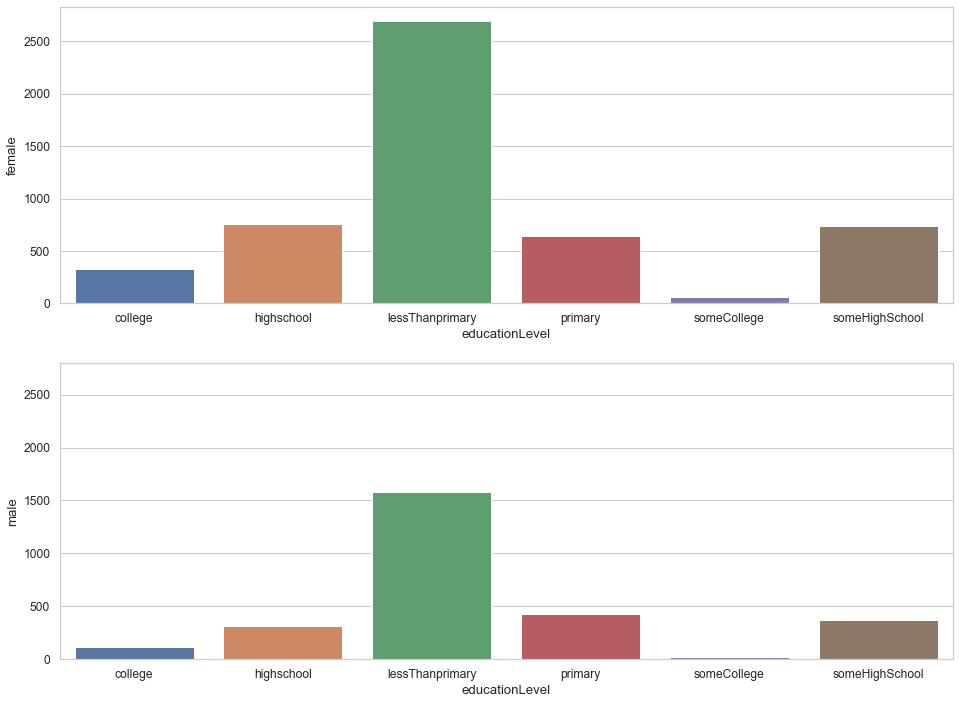

In [184]:
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(16, 12)
ax1 = sns.barplot(x = education_sex["educationLevel"], y = education_sex["female"], ax = ax1)
ax2 = sns.barplot(x = education_sex["educationLevel"], y = education_sex["male"], ax = ax2)
ax2.set(ylim=(0, 2800))

# EDA: evaluationmedical

In [185]:
eval_med = pd.read_csv("evaluationmedical_noDummies.csv")
eval_med.head()

,objectId,AssessmentandEvaluation,planOfAction,duration,seen_doctor,received_treatment_description,part_of_body,trauma_induced,condition_progression,AssessmentandEvaluation_Surgical,immediate_follow_up
0,bWCqNwtKYL,No,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,056xDPGU2U,No,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FoatG2gGXl,Yes,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,dzkEclDkh9,Yes,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ao66iABlET,Yes,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
print(eval_med.shape)

(9765, 11)


In [187]:
eval_med.isnull().sum()

objectId                               0
AssessmentandEvaluation                0
planOfAction                           0
duration                             973
seen_doctor                         5140
received_treatment_description      7063
part_of_body                        1865
trauma_induced                      1150
condition_progression               1203
AssessmentandEvaluation_Surgical    4188
immediate_follow_up                 4193
dtype: int64

seen_doctor, received_treatment_description, AssessmentandEvaluation_Surgical, and immediate_follow_up features have many nan values which means we should not use the features in our modelling. 

### AssessmentandEvaluation, planOfAction, duaration

In [188]:
for feat in eval_med.columns.to_list()[1:4]:
    print("Feature: " + feat)
    print("-------")
    print("")
    print(eval_med[feat].value_counts())
    print("Null values: " + str(eval_med[feat].isnull().sum()))
    print("")
    print("")

Feature: AssessmentandEvaluation
-------

Yes    8508
No     1257
Name: AssessmentandEvaluation, dtype: int64
Null values: 0


Feature: planOfAction
-------

none                2793
orthopedics         1209
general medicine    1170
other               1047
ophthalmology        821
cardiology           744
urology              451
gastroenterology     353
gynecology           289
pediatrics           286
laryngology          223
dermatology          143
general surgery      134
neurology            102
Name: planOfAction, dtype: int64
Null values: 0


Feature: duration
-------

after_5_years          2876
within_last_5_years    2405
within_last_year       2104
within_last_month      1407
Name: duration, dtype: int64
Null values: 973




In [189]:
plan_act = eval_med["planOfAction"].value_counts().reset_index().sort_values(by = "planOfAction", ascending = False)
plan_act.columns = ["planOfAction", "count"]
plan_act

,planOfAction,count
0,none,2793
1,orthopedics,1209
2,general medicine,1170
3,other,1047
4,ophthalmology,821
5,cardiology,744
6,urology,451
7,gastroenterology,353
8,gynecology,289
9,pediatrics,286


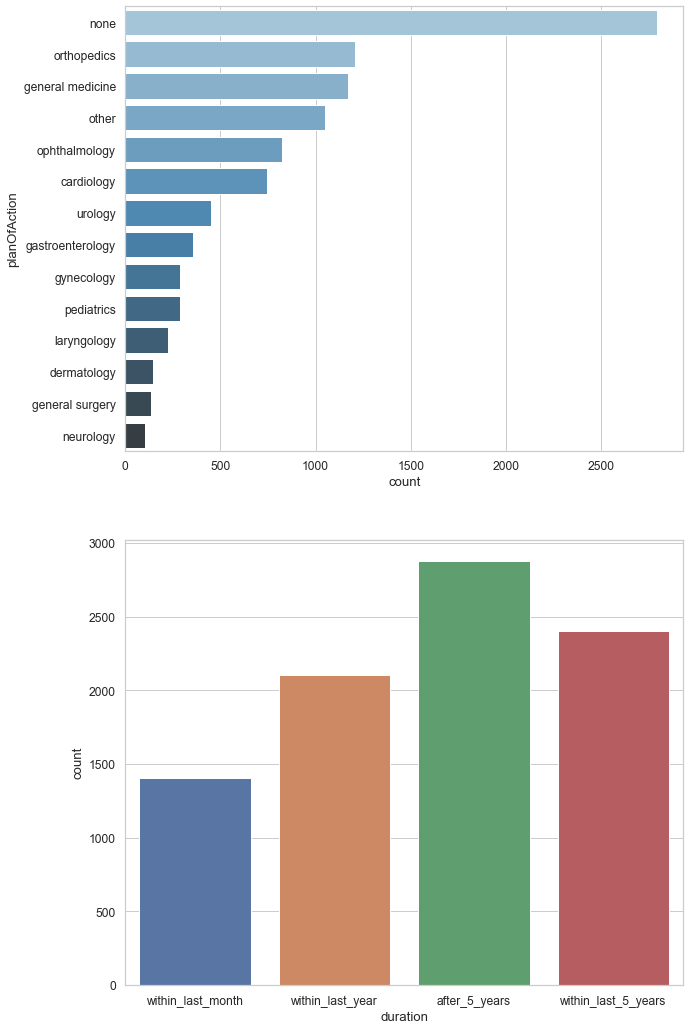

In [190]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(10, 18)
ax1 = sns.barplot(y = plan_act["planOfAction"], x = plan_act["count"], palette="Blues_d", ax = ax1)
ax2 = sns.countplot(x = "duration", data = eval_med, ax = ax2)

### Part of body, trauma induced, condition progression

In [191]:
for feat in eval_med.columns.to_list()[6:9]:
    print("Feature: " + feat)
    print("-------")
    print("")
    print(eval_med[feat].value_counts())
    print("Null values: " + str(eval_med[feat].isnull().sum()))
    print("")
    print("")

Feature: part_of_body
-------

bones_or_joints        2594
eyes                   1449
head_mental_issue       908
stomach_intestines      821
ear_nose_throat         619
bladder_urinary         598
skin                    408
reproductive_organs     378
nutrition               125
Name: part_of_body, dtype: int64
Null values: 1865


Feature: trauma_induced
-------

gradually                         5702
suddenly_but_not_due_to_trauma    2133
suddenly_due_to_trauma             780
Name: trauma_induced, dtype: int64
Null values: 1150


Feature: condition_progression
-------

constant    6187
worsen      1608
improve      767
Name: condition_progression, dtype: int64
Null values: 1203




In [192]:
trauma_indeced_dist = eval_med.trauma_induced.value_counts().reset_index()
trauma_indeced_dist.columns = ["trauma_induced", "count"]
trauma_indeced_dist

,trauma_induced,count
0,gradually,5702
1,suddenly_but_not_due_to_trauma,2133
2,suddenly_due_to_trauma,780


In [193]:
cond_progression_dist = eval_med.condition_progression.value_counts().reset_index()
cond_progression_dist.columns = ["condition_progression", "count"]
cond_progression_dist

,condition_progression,count
0,constant,6187
1,worsen,1608
2,improve,767


[Text(0, 0, 'skin'),
 Text(1, 0, 'eyes'),
 Text(2, 0, 'stomach_intestines'),
 Text(3, 0, 'bones_or_joints'),
 Text(4, 0, 'reproductive_organs'),
 Text(5, 0, 'ear_nose_throat'),
 Text(6, 0, 'bladder_urinary'),
 Text(7, 0, 'head_mental_issue'),
 Text(8, 0, 'nutrition')]

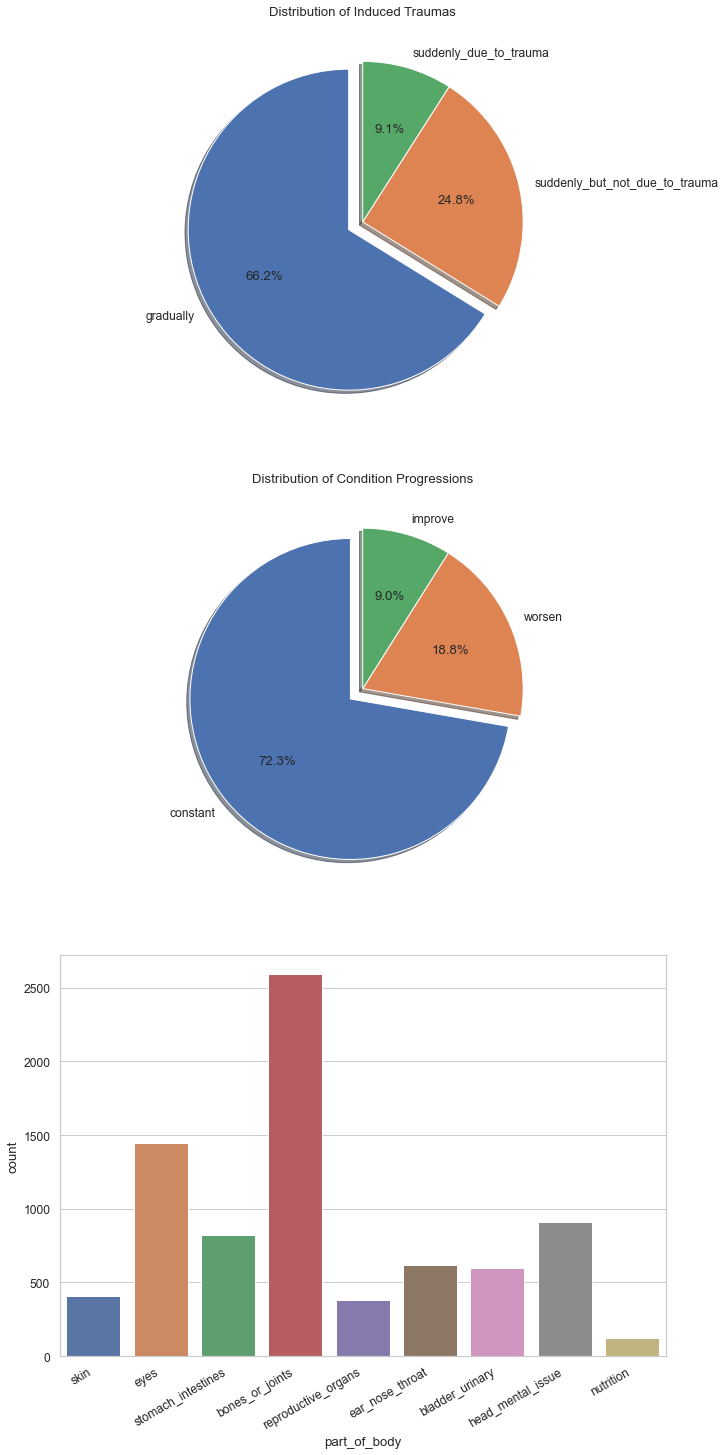

In [194]:
explode = (0.1,0,0)
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
fig.set_size_inches(10,20)
fig.tight_layout(pad=3.0)

ax1.pie(trauma_indeced_dist["count"], explode = explode, labels = trauma_indeced_dist["trauma_induced"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title("Distribution of Induced Traumas") # not sure about the title

ax2.pie(cond_progression_dist["count"], explode = explode, labels = cond_progression_dist["condition_progression"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.set_title("Distribution of Condition Progressions")

ax3 = sns.countplot(x = "part_of_body", data = eval_med, ax = ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), 
                          rotation=30, 
                          horizontalalignment='right')

### Relationships between variables

In [195]:
part_body_progress = pd.crosstab(index = eval_med["part_of_body"], columns = eval_med["condition_progression"])
part_body_progress

condition_progression,constant,improve,worsen
part_of_body,,,
bladder_urinary,427,72,75
bones_or_joints,1810,190,492
ear_nose_throat,403,72,91
eyes,816,62,518
head_mental_issue,680,48,96
nutrition,87,20,10
reproductive_organs,259,40,70
skin,200,100,89
stomach_intestines,635,69,77


In [196]:
body_progress_percent = pd.crosstab(index = eval_med["part_of_body"], columns = eval_med["condition_progression"]).apply(lambda r: r/r.sum(), axis=1)
body_progress_percent

condition_progression,constant,improve,worsen
part_of_body,,,
bladder_urinary,0.743902,0.125436,0.130662
bones_or_joints,0.726324,0.076244,0.197432
ear_nose_throat,0.712014,0.127208,0.160777
eyes,0.584527,0.044413,0.371060
head_mental_issue,0.825243,0.058252,0.116505
nutrition,0.743590,0.170940,0.085470
reproductive_organs,0.701897,0.108401,0.189702
skin,0.514139,0.257069,0.228792
stomach_intestines,0.813060,0.088348,0.098592


In [197]:
# graphs about the crosstab
""" fig, (ax1,ax2,ax3) = plt.subplots(3,1) 
fig.set_size_inches(10,20)
fig.tight_layout(pad=7.0)

ax1 = sns.barplot(x = part_body_progress.index, y = part_body_progress["constant"], ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), 
                          rotation=30, 
                          horizontalalignment='right')
ax1.set_ylabel("Constant Progression Count")

ax2 = sns.barplot(x = part_body_progress.index, y = part_body_progress["improve"], ax = ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), 
                          rotation=30, 
                          horizontalalignment='right')
ax2.set_ylabel("Improved Progression Count")
#ax2.set(ylim=(0, 1800))

ax3 = sns.barplot(x = part_body_progress.index, y = part_body_progress["worsen"], ax = ax3)
ax3.set_xticklabels(ax2.get_xticklabels(), 
                          rotation=30, 
                          horizontalalignment='right')
ax3.set_ylabel("Worsened Progression Count")
#ax3.set(ylim=(0, 1800))
"""

' fig, (ax1,ax2,ax3) = plt.subplots(3,1) \nfig.set_size_inches(10,20)\nfig.tight_layout(pad=7.0)\n\nax1 = sns.barplot(x = part_body_progress.index, y = part_body_progress["constant"], ax = ax1)\nax1.set_xticklabels(ax1.get_xticklabels(), \n                          rotation=30, \n                          horizontalalignment=\'right\')\nax1.set_ylabel("Constant Progression Count")\n\nax2 = sns.barplot(x = part_body_progress.index, y = part_body_progress["improve"], ax = ax2)\nax2.set_xticklabels(ax2.get_xticklabels(), \n                          rotation=30, \n                          horizontalalignment=\'right\')\nax2.set_ylabel("Improved Progression Count")\n#ax2.set(ylim=(0, 1800))\n\nax3 = sns.barplot(x = part_body_progress.index, y = part_body_progress["worsen"], ax = ax3)\nax3.set_xticklabels(ax2.get_xticklabels(), \n                          rotation=30, \n                          horizontalalignment=\'right\')\nax3.set_ylabel("Worsened Progression Count")\n#ax3.set(ylim=(0, 

Text(0.5, 1.0, 'Progression of Traumas (%)')

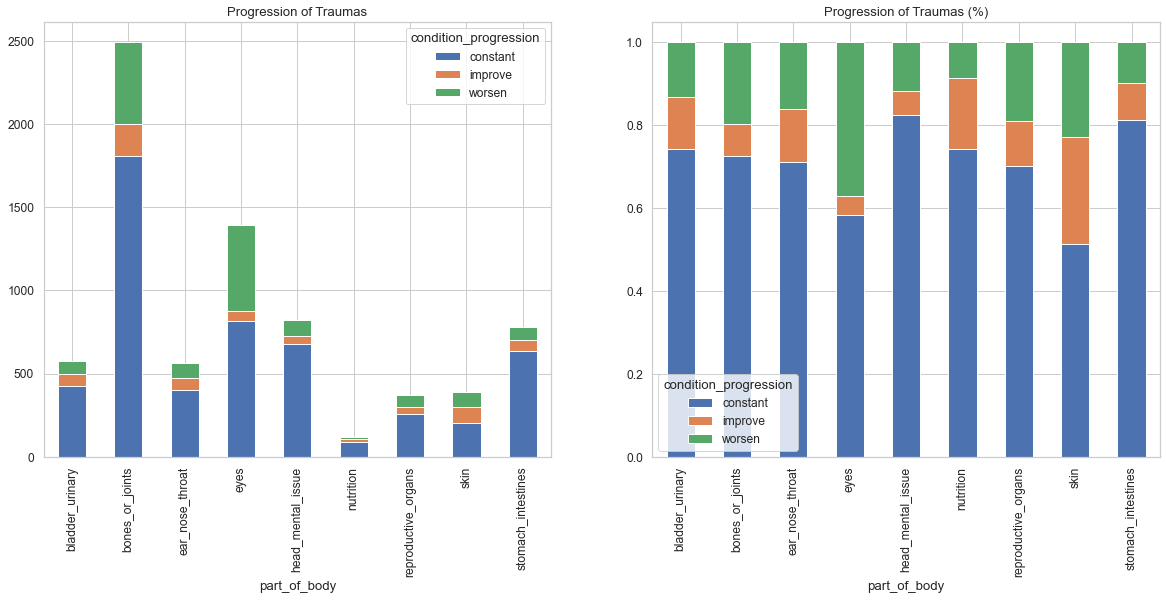

In [252]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(20,8)
ax1 = part_body_progress.plot(kind = "bar", stacked = True, ax = ax1)
ax1.set_title("Progression of Traumas")
ax2 = body_progress_percent.plot(kind = "bar", stacked = True, ax = ax2)
ax2.set_title("Progression of Traumas (%)")

In [199]:
body_trauma_induced = pd.crosstab(index = eval_med["part_of_body"], columns = eval_med["trauma_induced"])
body_trauma_induced

trauma_induced,gradually,suddenly_but_not_due_to_trauma,suddenly_due_to_trauma
part_of_body,,,
bladder_urinary,405,156,21
bones_or_joints,1334,667,471
ear_nose_throat,364,176,35
eyes,1032,287,79
head_mental_issue,527,228,68
nutrition,90,24,2
reproductive_organs,261,86,18
skin,260,101,22
stomach_intestines,606,153,24


In [200]:
body_trauma_induced_perc = pd.crosstab(index = eval_med["part_of_body"], columns = eval_med["trauma_induced"]).apply(lambda r: r/r.sum(), axis=1)
body_trauma_induced_perc

trauma_induced,gradually,suddenly_but_not_due_to_trauma,suddenly_due_to_trauma
part_of_body,,,
bladder_urinary,0.695876,0.268041,0.036082
bones_or_joints,0.539644,0.269822,0.190534
ear_nose_throat,0.633043,0.306087,0.060870
eyes,0.738197,0.205293,0.056509
head_mental_issue,0.640340,0.277035,0.082625
nutrition,0.775862,0.206897,0.017241
reproductive_organs,0.715068,0.235616,0.049315
skin,0.678851,0.263708,0.057441
stomach_intestines,0.773946,0.195402,0.030651


Text(0.5, 1.0, 'Inducement of Traumas (%)')

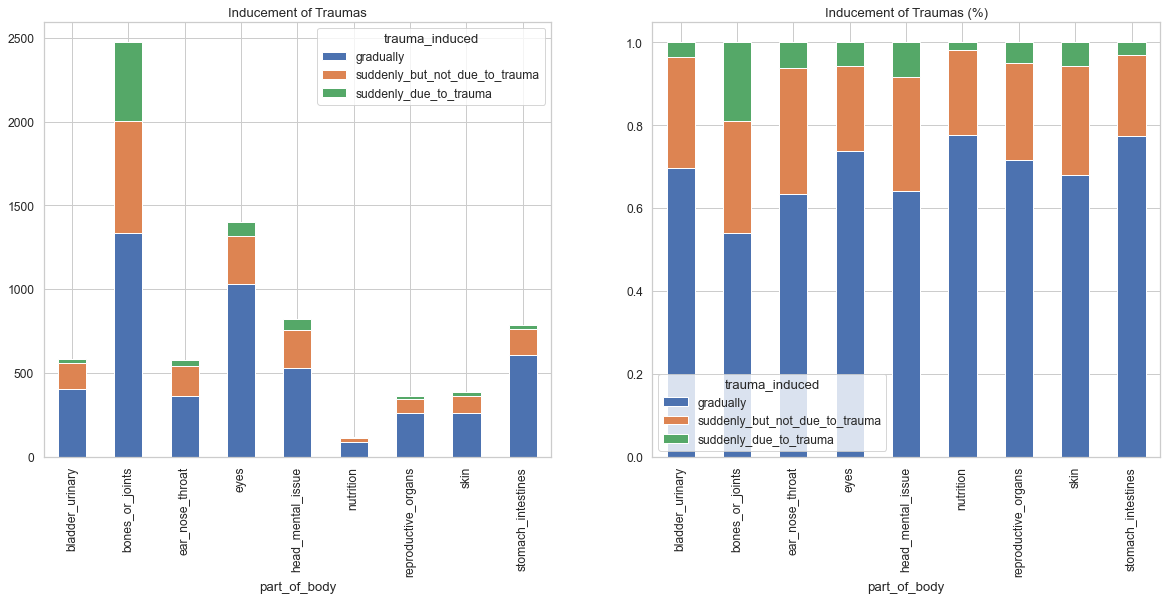

In [255]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(20,8)
ax1 = body_trauma_induced.plot(kind = "bar", stacked = True, ax = ax1)
ax1.set_title("Inducement of Traumas")
ax2 = body_trauma_induced_perc.plot(kind = "bar", stacked = True, ax = ax2)
ax2.set_title("Inducement of Traumas (%)")

# EDA: historyenv

In [202]:
history_env = pd.read_csv("historyenv_noDummies.csv")
history_env.head()

,objectId,yearsLivedinthecommunity,yearsLivedinThisHouse,waterAccess,typeofWaterdoyoudrink,latrineAccess,clinicAccess,conditionoFloorinyourhouse,conditionoRoofinyourhouse,medicalproblemswheredoyougo,dentalproblemswheredoyougo,biggestproblemofcommunity,timesperweektrashcollected,wheretrashleftbetweenpickups,numberofIndividualsLivingintheHouse,numberofChildrenLivinginHouseUndertheAgeof5,houseownership,bathroomAccess,stoveType
0,Psto9poSCx,1-2,1-2,NaN,NaN,NaN,NaN,NaN,NaN,Other,Other,Other,0,other,4,0,NaN,NaN,NaN
1,y6DJO1kLFl,lessThan1,lessThan1,NaN,NaN,NaN,NaN,NaN,NaN,Other,Other,Other,0,other,4,0,NaN,NaN,NaN
2,sdPbSYrGCW,5-10,5-10,2-3AWeek,bottled,Y,Y,cementPoor,poor,Other Hospital,Other,Water,2,street,4,0,NaN,NaN,NaN
3,GiArohoFUo,moreThan10,moreThan10,2-3AWeek,tap,Y,Y,cementWorking,NaN,Other,Clinic,Other,3,other,4,0,NaN,NaN,NaN
4,rnNw8AxEix,moreThan10,moreThan10,4-6AWeek,bottled,Y,Y,cementWorking,working,Other Hospital,Other,Water,2,other,4,0,NaN,NaN,NaN


In [203]:
history_env.shape

(7546, 19)

In [204]:
history_env.isnull().sum()

objectId                                          0
yearsLivedinthecommunity                         23
yearsLivedinThisHouse                            32
waterAccess                                     126
typeofWaterdoyoudrink                            68
latrineAccess                                  2995
clinicAccess                                    107
conditionoFloorinyourhouse                      134
conditionoRoofinyourhouse                       168
medicalproblemswheredoyougo                       0
dentalproblemswheredoyougo                        0
biggestproblemofcommunity                         0
timesperweektrashcollected                        0
wheretrashleftbetweenpickups                      0
numberofIndividualsLivingintheHouse               0
numberofChildrenLivinginHouseUndertheAgeof5       0
houseownership                                  313
bathroomAccess                                 3923
stoveType                                      4729
dtype: int64

We should not use stoveType, bathroomAccess, and latrineAccess variables when building a model because there many nan values. 

### yearsLivedinthecommunity, yearsLivedinThisHouse, waterAccess, typeofWaterdoyoudrink 

In [205]:
history_env = history_env.replace({"1_2": "1-2", "3_4": "3-4", "5_10": "5-10"})

In [206]:
for feat in history_env.columns.to_list()[1:5]:
    print("Feature: " + feat)
    print("-------")
    print("")
    print(history_env[feat].value_counts())
    print("Null values: " + str(history_env[feat].isnull().sum()))
    print("")
    print("")    

Feature: yearsLivedinthecommunity
-------

moreThan10    5107
5-10           905
1-2            593
3-4            588
lessThan1      330
Name: yearsLivedinthecommunity, dtype: int64
Null values: 23


Feature: yearsLivedinThisHouse
-------

moreThan10    3970
5-10          1179
1-2            867
3-4            779
lessThan1      719
Name: yearsLivedinThisHouse, dtype: int64
Null values: 32


Feature: waterAccess
-------

everyday    3596
2-3AWeek    2089
Never        620
1AWeek       478
4-6AWeek     467
1AMonth      170
Name: waterAccess, dtype: int64
Null values: 126


Feature: typeofWaterdoyoudrink
-------

bottled     5839
tap         1488
filtered     151
Name: typeofWaterdoyoudrink, dtype: int64
Null values: 68




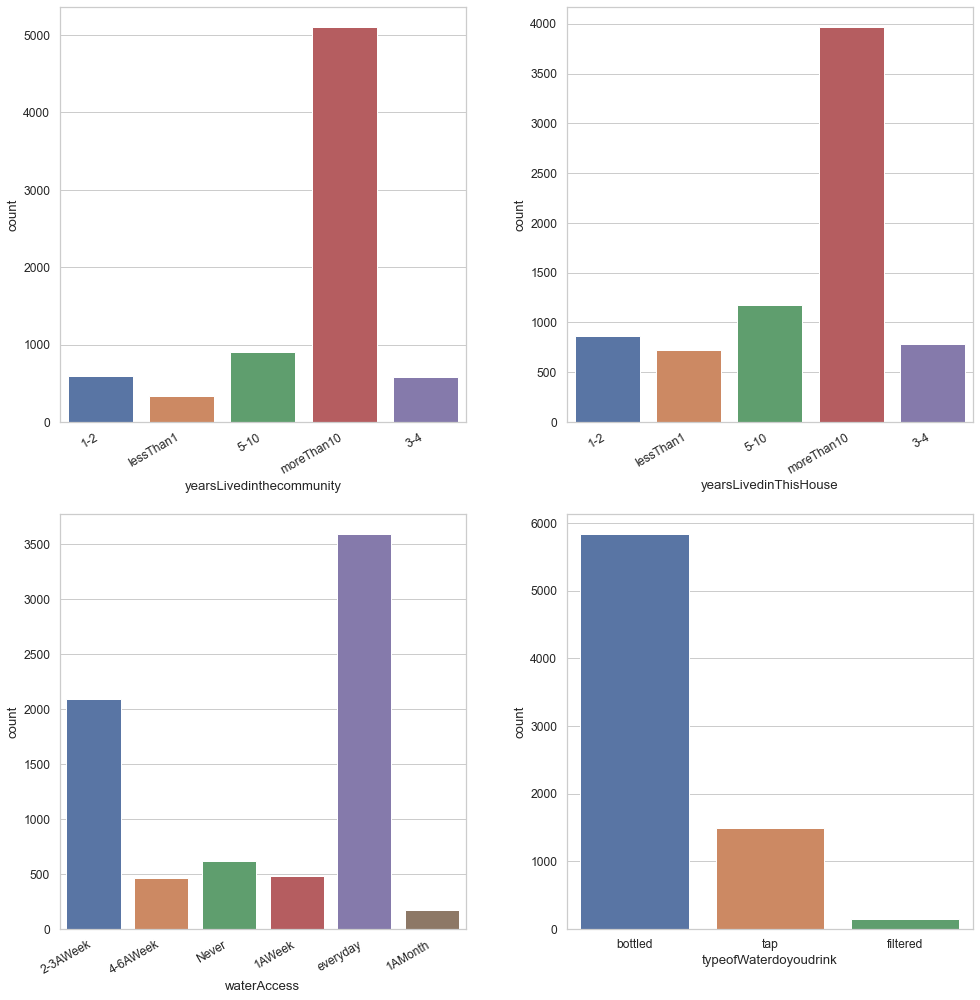

In [207]:
fig, ((ax1,ax2), (ax3,ax4))= plt.subplots(2,2)
fig.set_size_inches(15,15)
fig.tight_layout(pad=5.0)

ax1 = sns.countplot(x = "yearsLivedinthecommunity", data = history_env, ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), 
                          rotation=30, 
                          horizontalalignment='right')

ax2 = sns.countplot(x = "yearsLivedinThisHouse", data = history_env, ax = ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), 
                          rotation=30, 
                          horizontalalignment='right')

ax3 = sns.countplot(x = "waterAccess", data = history_env, ax = ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), 
                          rotation=30, 
                          horizontalalignment='right')

ax4 = sns.countplot(x = "typeofWaterdoyoudrink", data = history_env, ax = ax4)

### clinicAccess, conditionoFloorinyourhouse, conditionoRoofinyourhouse 

In [208]:
for feat in history_env.columns.to_list()[6:9]:
    print("Feature: " + feat)
    print("-------")
    print("")
    print(history_env[feat].value_counts())
    print("Null values: " + str(history_env[feat].isnull().sum()))
    print("")
    print("")   

Feature: clinicAccess
-------

Y    5269
N    2170
Name: clinicAccess, dtype: int64
Null values: 107


Feature: conditionoFloorinyourhouse
-------

cementWorking    4373
cementPoor       2365
dirtPoor          386
dirtWorking       288
Name: conditionoFloorinyourhouse, dtype: int64
Null values: 134


Feature: conditionoRoofinyourhouse
-------

working    5158
poor       2220
Name: conditionoRoofinyourhouse, dtype: int64
Null values: 168




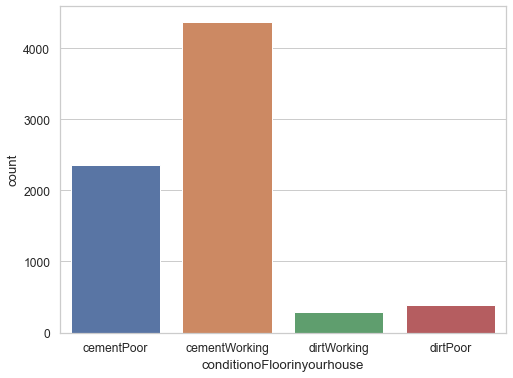

In [209]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
ax1 = sns.countplot(x = "conditionoFloorinyourhouse", data = history_env, ax = ax)

### All the remaining

In [210]:
for feat in history_env.columns.to_list()[9:-2]:
    print("Feature: " + feat)
    print("-------")
    print("")
    print(history_env[feat].value_counts())
    print("Null values: " + str(history_env[feat].isnull().sum()))
    print("")
    print("")  

Feature: medicalproblemswheredoyougo
-------

Other Hospital            2616
Other                     2513
Al Musa Hospital          1083
Clinic                     777
Ramon Santana Hospital     557
Name: medicalproblemswheredoyougo, dtype: int64
Null values: 0


Feature: dentalproblemswheredoyougo
-------

Other                     3441
Other Hospital            1730
Al Musa Hospital           815
Dentist                    594
Ramon Santana Hospital     530
Clinic                     436
Name: dentalproblemswheredoyougo, dtype: int64
Null values: 0


Feature: biggestproblemofcommunity
-------

Other           2783
Roads           1644
Water           1627
Garbage          774
Unemployment     217
Health           207
Lighting         150
Delinquents      144
Name: biggestproblemofcommunity, dtype: int64
Null values: 0


Feature: timesperweektrashcollected
-------

1          4595
0          1341
2           894
Unknown     299
Burned      261
3            66
7            39
15     

In [211]:
history_env.dtypes

objectId                                       object
yearsLivedinthecommunity                       object
yearsLivedinThisHouse                          object
waterAccess                                    object
typeofWaterdoyoudrink                          object
latrineAccess                                  object
clinicAccess                                   object
conditionoFloorinyourhouse                     object
conditionoRoofinyourhouse                      object
medicalproblemswheredoyougo                    object
dentalproblemswheredoyougo                     object
biggestproblemofcommunity                      object
timesperweektrashcollected                     object
wheretrashleftbetweenpickups                   object
numberofIndividualsLivingintheHouse             int64
numberofChildrenLivinginHouseUndertheAgeof5     int64
houseownership                                 object
bathroomAccess                                 object
stoveType                   

### biggestproblemofcommunity

[Text(0, 0, 'Other'),
 Text(1, 0, 'Water'),
 Text(2, 0, 'Unemployment'),
 Text(3, 0, 'Delinquents'),
 Text(4, 0, 'Roads'),
 Text(5, 0, 'Garbage'),
 Text(6, 0, 'Lighting'),
 Text(7, 0, 'Health')]

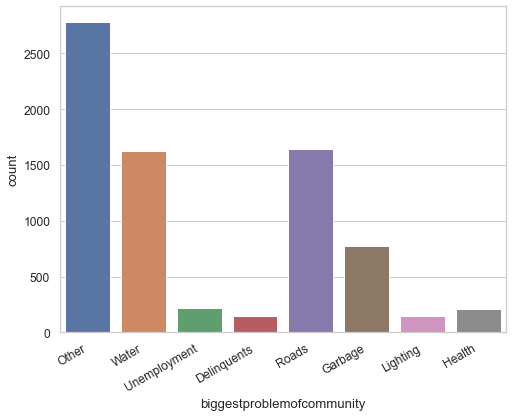

In [212]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
ax1 = sns.countplot(x = "biggestproblemofcommunity", data = history_env, ax = ax)
ax1.set_xticklabels(ax1.get_xticklabels(), 
                          rotation=30, 
                          horizontalalignment='right')

### timesperweektrashcollected

In [213]:
def categorizing(x):
    if x == "0":
        return x
    elif x == "1" or x == "2":
        return "1-2"
    elif x == "3" or x == "4" or x == "5":
        return "3-5"
    elif x == "6" or x == "7" or x == "8":
        return "6-8"
    elif x == "13" or x == "14" or x == "15":
        return "13-15"
    elif x == "20":
        return "1-2" #20 is an outlier
    else:
        return x
        

In [214]:
history_env["timesperweektrashcollected"] = history_env["timesperweektrashcollected"].apply(categorizing)

In [215]:
history_env["timesperweektrashcollected"].value_counts()

1-2        5490
0          1341
Unknown     299
Burned      261
3-5          88
6-8          40
13-15        27
Name: timesperweektrashcollected, dtype: int64

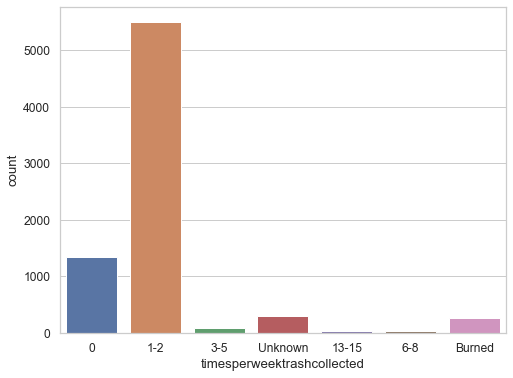

In [216]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
ax1 = sns.countplot(x = "timesperweektrashcollected", data = history_env)

### numberofIndividualsLivingintheHouse, numberofChildrenLivinginHouseUndertheAgeof5

In [217]:
def del_outliers1(x):
    if x == 20 or x == 42 or x == 33:
        return 4
    else:
        return x

In [218]:
history_env["numberofIndividualsLivingintheHouse"] = history_env["numberofIndividualsLivingintheHouse"].apply(del_outliers1) #deleating outliers

In [219]:
def del_outliers2(x):
    if x == 212 or x == 12:
        return 0
    else:
        return x

In [220]:
history_env["numberofChildrenLivinginHouseUndertheAgeof5"] = history_env["numberofChildrenLivinginHouseUndertheAgeof5"].apply(del_outliers2)

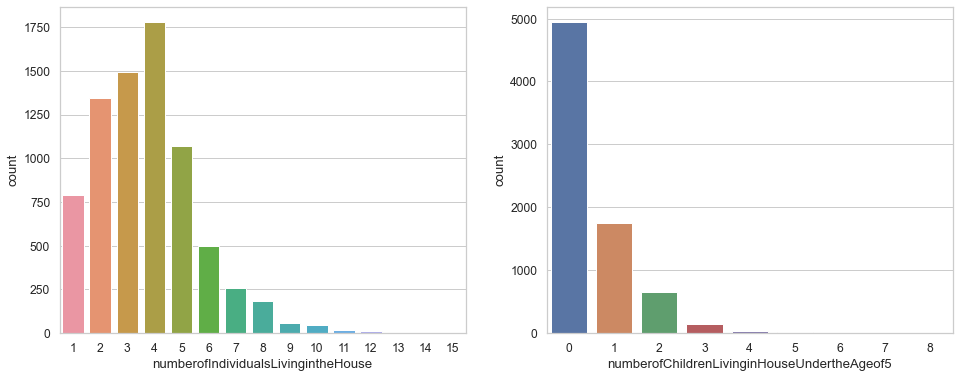

In [221]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,6)
ax1 = sns.countplot(x = "numberofIndividualsLivingintheHouse", data = history_env, ax = ax1)
ax2 = sns.countplot(x = "numberofChildrenLivinginHouseUndertheAgeof5", data = history_env, ax = ax2)

### Checking if ids are same in different dataframes

In [276]:
from collections import Counter

In [223]:
history_env.head()

,objectId,yearsLivedinthecommunity,yearsLivedinThisHouse,waterAccess,typeofWaterdoyoudrink,latrineAccess,clinicAccess,conditionoFloorinyourhouse,conditionoRoofinyourhouse,medicalproblemswheredoyougo,dentalproblemswheredoyougo,biggestproblemofcommunity,timesperweektrashcollected,wheretrashleftbetweenpickups,numberofIndividualsLivingintheHouse,numberofChildrenLivinginHouseUndertheAgeof5,houseownership,bathroomAccess,stoveType
0,Psto9poSCx,1-2,1-2,NaN,NaN,NaN,NaN,NaN,NaN,Other,Other,Other,0,other,4,0,NaN,NaN,NaN
1,y6DJO1kLFl,lessThan1,lessThan1,NaN,NaN,NaN,NaN,NaN,NaN,Other,Other,Other,0,other,4,0,NaN,NaN,NaN
2,sdPbSYrGCW,5-10,5-10,2-3AWeek,bottled,Y,Y,cementPoor,poor,Other Hospital,Other,Water,1-2,street,4,0,NaN,NaN,NaN
3,GiArohoFUo,moreThan10,moreThan10,2-3AWeek,tap,Y,Y,cementWorking,NaN,Other,Clinic,Other,3-5,other,4,0,NaN,NaN,NaN
4,rnNw8AxEix,moreThan10,moreThan10,4-6AWeek,bottled,Y,Y,cementWorking,working,Other Hospital,Other,Water,1-2,other,4,0,NaN,NaN,NaN


In [224]:
eval_med.head()

,objectId,AssessmentandEvaluation,planOfAction,duration,seen_doctor,received_treatment_description,part_of_body,trauma_induced,condition_progression,AssessmentandEvaluation_Surgical,immediate_follow_up
0,bWCqNwtKYL,No,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,056xDPGU2U,No,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FoatG2gGXl,Yes,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,dzkEclDkh9,Yes,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ao66iABlET,Yes,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
eval_med.objectId

0       bWCqNwtKYL
1       056xDPGU2U
2       FoatG2gGXl
3       dzkEclDkh9
4       ao66iABlET
           ...    
9760    8FA5WnKdF3
9761    lQZ5bKXxvk
9762    zkue4kgfIK
9763    FzbH4DjbVx
9764    FzbH4DjbVx
Name: objectId, Length: 9765, dtype: object

In [280]:
id_list1 = list(np.in1d(eval_med.objectId, history_env.objectId))
Counter(id_list1)

Counter({False: 3182, True: 6583})

In [420]:
id_list2 = list(np.in1d(eval_med.objectId, survey_vitals.objectId))
Counter(id_list2)

Counter({True: 9720, False: 45})

In [282]:
id_list3 = list(np.in1d(history_env.objectId, survey_vitals.objectId))
Counter(id_list3)

Counter({True: 7505, False: 41})

In [421]:
print(history_env.shape)
print(eval_med.shape)
print(survey_vitals.shape)

(7546, 19)
(9765, 11)
(9599, 16)


# Creating dfs that have only columns that are important for us

### 1. Survey_vitals Final

In [283]:
survey_vitals.columns

Index(['objectId', 'marriageStatus', 'occupation', 'educationLevel',
       'latitude', 'longitude', 'city', 'province', 'insuranceProvider',
       'weight', 'pulse', 'bloodSugar', 'M', 'F', 'age', 'sex'],
      dtype='object')

In [380]:
imp_cols = ['objectId', 'marriageStatus', 'occupation', 'educationLevel',
       'latitude', 'longitude', 'city', 'province', "age", "sex"]

In [381]:
survey_vitals.head()

,objectId,marriageStatus,occupation,educationLevel,latitude,longitude,city,province,insuranceProvider,weight,pulse,bloodSugar,M,F,age,sex
0,XHCkKebF4a,single,Ama de casa,lessThanprimary,18.912087,-70.743801,NaN,NaN,NaN,NaN,NaN,NaN,0,1,34.0,female
1,nCqmOAp4r9,concubine,Other,highschool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,36.0,male
2,E6Muqo5331,concubine,Other,lessThanprimary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,41.0,female
3,LwMJ2wrMkZ,single,Ama de casa,highschool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,30.0,female
4,4kBFEjUSNz,single,Ama de casa,primary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,49.0,female


In [382]:
survey_vitals_final = survey_vitals.loc[:,imp_cols]
survey_vitals_final = survey_vitals_final.query('-75 <= longitude <= -50 & 15 <= latitude <= 21')
survey_vitals_final.head()

,objectId,marriageStatus,occupation,educationLevel,latitude,longitude,city,province,age,sex
0,XHCkKebF4a,single,Ama de casa,lessThanprimary,18.912087,-70.743801,NaN,NaN,34.0,female
19,ITCa1BkIiK,single,Ama de casa,someHighSchool,18.913084,-70.744104,NaN,NaN,52.0,female
20,AKjkw9A25J,single,Other,someHighSchool,18.913084,-70.744016,NaN,NaN,39.0,male
21,jk3fDkMvN9,single,Ama de casa,lessThanprimary,18.913325,-70.744557,NaN,NaN,39.0,female
22,pPgDn3kfGL,single,Estudiante,someHighSchool,18.913523,-70.745053,NaN,NaN,23.0,male


In [383]:
print(survey_vitals_final.shape)

(9458, 10)


In [384]:
survey_vitals_final.isna().sum()

objectId             0
marriageStatus    1597
occupation           0
educationLevel    1486
latitude             0
longitude            0
city              1192
province          1273
age                482
sex                  0
dtype: int64

In [415]:
#survey_vitals_final.to_csv("survey_vitals_clean.csv")

### 1.2 Eval_med Final

In [385]:
eval_med.columns

Index(['objectId', 'AssessmentandEvaluation', 'planOfAction', 'duration',
       'seen_doctor', 'received_treatment_description', 'part_of_body',
       'trauma_induced', 'condition_progression',
       'AssessmentandEvaluation_Surgical', 'immediate_follow_up'],
      dtype='object')

In [404]:
imp_cols2 = ['objectId', 'AssessmentandEvaluation', 'planOfAction', 'duration','part_of_body',
       'trauma_induced', 'condition_progression']

In [405]:
eval_med_final = eval_med.loc[:, imp_cols2]

In [402]:
eval_med_final.isna().sum()

objectId                      0
AssessmentandEvaluation       0
planOfAction                  0
duration                    973
part_of_body               1865
trauma_induced             1150
condition_progression      1203
dtype: int64

In [417]:
#eval_med_final.to_csv("evaluation_medical_clean.csv")

### 1.3 History_env Final 

In [403]:
history_env.columns

Index(['objectId', 'yearsLivedinthecommunity', 'yearsLivedinThisHouse',
       'waterAccess', 'typeofWaterdoyoudrink', 'latrineAccess', 'clinicAccess',
       'conditionoFloorinyourhouse', 'conditionoRoofinyourhouse',
       'medicalproblemswheredoyougo', 'dentalproblemswheredoyougo',
       'biggestproblemofcommunity', 'timesperweektrashcollected',
       'wheretrashleftbetweenpickups', 'numberofIndividualsLivingintheHouse',
       'numberofChildrenLivinginHouseUndertheAgeof5', 'houseownership',
       'bathroomAccess', 'stoveType'],
      dtype='object')

In [410]:
imp_cols3 = ['objectId', 'yearsLivedinThisHouse',
       'waterAccess', 'typeofWaterdoyoudrink', 'latrineAccess',
       'conditionoFloorinyourhouse', 'conditionoRoofinyourhouse',
       'medicalproblemswheredoyougo', 'dentalproblemswheredoyougo',
       'biggestproblemofcommunity', 'timesperweektrashcollected',
       'wheretrashleftbetweenpickups', 'numberofIndividualsLivingintheHouse',
       'numberofChildrenLivinginHouseUndertheAgeof5', 'houseownership',
       'bathroomAccess']

In [411]:
history_env_final = history_env.loc[:, imp_cols3]

In [413]:
history_env_final.isna().sum()

objectId                                          0
yearsLivedinThisHouse                            32
waterAccess                                     126
typeofWaterdoyoudrink                            68
latrineAccess                                  2995
conditionoFloorinyourhouse                      134
conditionoRoofinyourhouse                       168
medicalproblemswheredoyougo                       0
dentalproblemswheredoyougo                        0
biggestproblemofcommunity                         0
timesperweektrashcollected                        0
wheretrashleftbetweenpickups                      0
numberofIndividualsLivingintheHouse               0
numberofChildrenLivinginHouseUndertheAgeof5       0
houseownership                                  313
bathroomAccess                                 3923
dtype: int64

In [419]:
#history_env_final.to_csv("history_env_clean.csv")